In [39]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline



In [40]:

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
!ln -s /Users/jephteestiverne/datagenerators.py datagenerators.py
import datagenerators as dg

ln: datagenerators.py: File exists


In [41]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")

%matplotlib inline

In [42]:
from itertools import combinations

# Week 1 Problem Set: Potential Outcomes


## The Data

In this problem set, we seek to build an understanding of the Potential Outcomes framework for understanding the value of experiments. I provide a stylized example of sales of Chipotle on the DoorDash App. The data set is from an "omniscient observer", where we can see the outcome for each individual when treated or not. Of course, such a dataset could never actually exist in real-life. Through the course of this problem set, we will ask you to simulate analysis based on subsets of the data that could actually be observed.

In this example we look at 40 DoorDash users, and track the amount of Chipotle they purchase of the course of 6 months. Some users receive the banner promotion and some do not.  
- 'Y1' represents total  chipotle sales for a user, had they been shown a  banner promotion
- 'Y0' represents total  chipotle sales for a user, had they *not* been shown a banner

However, in DoorDash's app, we  assume they created a production experience where they showed the banner to users within 3 miles of a Chipotle and did not show it to users further away.  
- 'near_chipotle' is a binary flag for whether a user's home address was within 3 miles of a Chipotle
- 'production_treatment' is a binary flag for whether the user is shown a banner promotion in DoorDash's production (or primary) app. 
- you should notice, these are identical


## Problem 1: Simple Difference in Outcomes
- A Read in the dataset
- B: Recreate what the dataset would look like when run in production. Create a variable *production_Y*, which is the observed outcome for each user. You should be able to do this with the switching equation
- C: Calculate the *Simple Difference In Outcomes*

## Problem 1 (continued)
- D: Calculate the Selection Bias
- E: Calculate the Heterogeneous Treatment Effect Bias

## Problem 1 (continued)
- F: Combine (C,D,E) to calculate the Average Treatment Effect

In [43]:
import pandas as pd
data = pd.read_csv (r'/Users/jephteestiverne/Desktop/Summer_2021/ECON_620_02/econ626_materials/Week 1/week_1_potential_outcomes.csv')
data.head(6)

,User,near_chipotle,production_treatment,Y0,Y1
0,0,1,1,12.27,23.25
1,1,1,1,14.18,25.77
2,2,1,1,12.16,19.16
3,3,1,1,13.99,24.38
4,4,1,1,14.84,25.21
5,5,1,1,14.97,24.03


<AxesSubplot:xlabel='near_chipotle'>

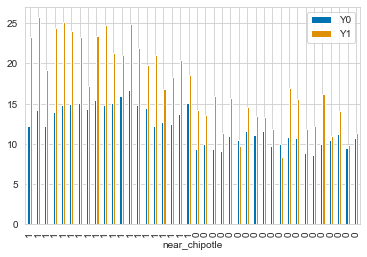

In [44]:
# Lets first observe our distributions and plotting some graphs:
data.plot(x="near_chipotle", y=["Y0", "Y1"], kind="bar")
### Observing the bar chart above, we might have a bias sample given the distribution of our binary sets 

<AxesSubplot:xlabel='near_chipotle'>

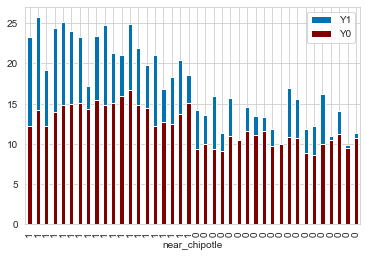

In [45]:
# plotting Height
ax = data.plot(x="near_chipotle", y="Y1", kind="bar")
# plotting age on the same axis
data.plot(x="near_chipotle", y="Y0", kind="bar", ax=ax, color="maroon")


<AxesSubplot:xlabel='production_treatment'>

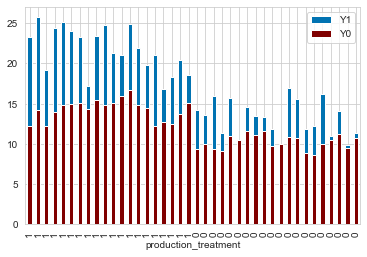

In [46]:
# plotting Height
ax = data.plot(x="production_treatment", y="Y1", kind="bar")
# plotting age on the same axis
data.plot(x="production_treatment", y="Y0", kind="bar", ax=ax, color="maroon")


<AxesSubplot:xlabel='production_treatment'>

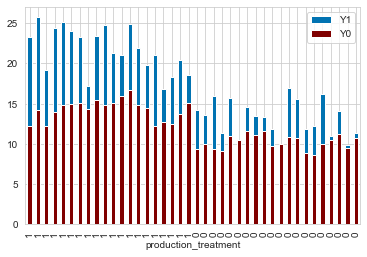

In [47]:
# plotting Height
ax = data.plot(x="User", y="Y1", kind="bar")
# plotting age on the same axis
data.plot(x="production_treatment", y="Y0", kind="bar", ax=ax, color="maroon")





In [8]:
data["Y_diff"] = data["Y1"]-data["Y0"] 
data_1 = data
data_2 = data
data_3 = data
data.head(6)

,User,near_chipotle,production_treatment,Y0,Y1,Y_diff
0,0,1,1,12.27,23.25,10.98
1,1,1,1,14.18,25.77,11.59
2,2,1,1,12.16,19.16,7.00
3,3,1,1,13.99,24.38,10.39
4,4,1,1,14.84,25.21,10.37
5,5,1,1,14.97,24.03,9.06


In [9]:
# We can calculate the average treatment effect if we have this matrix of data, because the average treatment effect is simply the mean difference between columns 5 and 4. 
# ATE is simply the average over these heterogeneous treatment effects.
data["Y_diff"].mean()

5.1575000000000015

In [12]:
def gap():
    sdo = pd.DataFrame({
        'y1': (23.25, 25.77, 19.16, 24.38, 25.21, 24.03, 23.26, 17.23, 23.36, 24.8, 21.32, 21.01, 24.92, 21.87, 19.83, 21.07, 16.77, 18.26, 20.38, 18.52, 14.19, 13.62, 15.9, 11.37, 15.7, 9.76, 14.6, 13.52, 13.31, 11.83, 8.3, 16.89, 15.52, 11.84, 12.18, 16.14, 11.01, 14.14, 9.81, 11.37),
        'y0' : (12.27,14.18, 12.16, 13.99, 14.84, 14.97, 15.06, 14.3, 15.41, 14.88, 15.1, 16.0, 16.64, 14.87, 14.5, 12.17, 12.74, 12.5, 13.67, 15.06, 9.32, 9.93, 9.35, 9.11, 10.97, 10.45, 11.55, 11.15, 11.56, 9.74, 10.0, 10.8, 10.74, 8.83, 8.57, 9.92, 10.44, 11.2, 9.44, 10.72),
        'random' : np.random.normal(size=40)})
    sdo.sort_values('random', inplace=True)
    sdo['d'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0]
    sdo['y'] = sdo['d']*sdo['y1'] + (1-sdo['d'])*sdo['y0']

    sdo = np.mean(sdo.y.values[0:5] - sdo.y.values[5:10])

    return sdo


sim = [gap() for x in range(1000)]
np.mean(sim)

0.10039000000000005

In [14]:
#This Monte Carlo runs 10,000 times, each time calculating the average SDO under independence—which is ensured by the random number sorting that occurs. In my running of this #program, the ATE is 5.1575, and the SDO is on average equal to 0.0053

In [15]:
### SDO = ATE  + selection bias OR selection bias = SDO - ATE = ### 

In [16]:
SB = np.mean(sim) - data["Y_diff"].mean()
SB

-5.0571100000000015

In [17]:
num_cols = data[["Y0", "Y1"]]
cat_cols = data[["User", "near_chipotle", "production_treatment"]]
cat_cols = data[["User"]]
df_one_hot = pd.get_dummies(data[["User", "near_chipotle", "production_treatment"]], drop_first=True)
df_cleaned = pd.concat([data[["Y0", "Y1"]], df_one_hot, data[["near_chipotle", "production_treatment"]]], axis=1)
df_cleaned.head()




,Y0,Y1,User,near_chipotle,production_treatment,near_chipotle,production_treatment
0,12.27,23.25,0,1,1,1,1
1,14.18,25.77,1,1,1,1,1
2,12.16,19.16,2,1,1,1,1
3,13.99,24.38,3,1,1,1,1
4,14.84,25.21,4,1,1,1,1


In [18]:

for elem in data['User'].unique():
    data[str(elem)] = data['User'] == elem



data["0"] = data["0"].astype(int)
data["1"] = data["1"].astype(int)
data["2"] = data["2"].astype(int)
data["3"] = data["3"].astype(int)
data["4"] = data["4"].astype(int)
data["5"] = data["5"].astype(int)
data["6"] = data["6"].astype(int)
data["7"] = data["7"].astype(int)
data["8"] = data["8"].astype(int)
data["9"] = data["9"].astype(int)
data["10"] = data["10"].astype(int)
data["11"] = data["11"].astype(int)
data["12"] = data["12"].astype(int)
data["13"] = data["13"].astype(int)
data["14"] = data["14"].astype(int)
data["15"] = data["15"].astype(int)
data["16"] = data["16"].astype(int)
data["17"] = data["17"].astype(int)
data["18"] = data["18"].astype(int)
data["19"] = data["19"].astype(int)
data["20"] = data["20"].astype(int)


data["21"] = data["21"].astype(int)
data["22"] = data["22"].astype(int)
data["23"] = data["23"].astype(int)
data["24"] = data["24"].astype(int)
data["25"] = data["25"].astype(int)
data["26"] = data["26"].astype(int)
data["27"] = data["27"].astype(int)
data["28"] = data["28"].astype(int)
data["29"] = data["29"].astype(int)
data["30"] = data["30"].astype(int)


data["31"] = data["31"].astype(int)
data["32"] = data["32"].astype(int)
data["33"] = data["33"].astype(int)
data["34"] = data["34"].astype(int)
data["35"] = data["35"].astype(int)
data["36"] = data["36"].astype(int)
data["37"] = data["37"].astype(int)
data["38"] = data["38"].astype(int)
data["39"] = data["39"].astype(int)

data.head(6)

,User,near_chipotle,production_treatment,Y0,Y1,Y_diff,0,1,2,3,...,30,31,32,33,34,35,36,37,38,39
0,0,1,1,12.27,23.25,10.98,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,14.18,25.77,11.59,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,12.16,19.16,7.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,13.99,24.38,10.39,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,14.84,25.21,10.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,1,14.97,24.03,9.06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
features = df_cleaned.columns.tolist()
agg_operations = {"production_treatment": 'count'}
agg_operations.update({
    feature: ['mean', 'std'] for feature in features
})



In [20]:
table_one = data.groupby("production_treatment").agg(agg_operations)
# merge MultiIndex columns together into 1 level
# table_one.columns = ['_'.join(col) for col in table_one.columns.values]
table_one.head()

production_treatment            Y0               Y1  \
                                     mean  std     mean       std   mean   
production_treatment                                                       
0                                       0  0.0  10.1895  0.900488  13.05   
1                                       1  0.0  14.2655  1.302413  21.72   

                                User          near_chipotle       
                           std  mean      std          mean  std  
production_treatment                                              
0                     2.389045  29.5  5.91608             0  0.0  
1                     2.791221   9.5  5.91608             1  0.0

In [ ]:
from itertools import combinations

## Problem 2: Simulate an Experiment
If DoorDash ran a randomized experiment, they would have a different data set to observe. Now create what a dataset would look like had the experiment been run
- A: Create a new variable *experiment_treatment*, where a random 50% percent of users are treated with the Banner Promotion, and the other 50% are not
- B: Create a new variable *experiment_y* which is the observed outcome for each user from this hypothetical experiment. 
- C: Calculate the average treatment effect from this experiment
- D: Repeat this calculation 1000 times. Plot a histogram of the estimated average treatment effects. What is the mean and variance of the average treatment effect? (You will be asked to used the reuse the analysis you did in 2B and 2C in problem 3. You may want to make a copy of this dataframe or create a new variable to handle your simulations). 

In [22]:
from itertools import combinations
data['id'] = range(1,41)
treated = range(1,5)

combo = pd.DataFrame(np.array(list(combinations(data['id'], 4))), 
                     columns=['treated1', 'treated2', 'treated3', 'treated4'])

combo['permutation'] = np.arange(1,91391)

combo['key'] = 1
data['key'] = 1
combo = pd.merge(data, combo, on='key')
combo.head(6)
combo.drop('key', axis=1, inplace=True)
combo = combo.sort_values(['permutation', 'User'])

combo['d'] = 0
combo.loc[(combo.treated1==combo.id) | 
          (combo.treated2==combo.id) | 
          (combo.treated3==combo.id) | 
          (combo.treated4==combo.id), 'd'] = 1




te1 = combo[combo.d==1].groupby('permutation')['Y_diff'].mean()
te0 = combo[combo.d==0].groupby('permutation')['Y_diff'].mean()



n = pd.merge(te1, te0, how='inner', on="permutation").shape[0]

p_value = pd.merge(te1, te0, how='inner', on="permutation")
p_value.columns = ['te1', 'te0']
p_value = p_value.reset_index()
p_value['ate'] = p_value['te1'] - p_value['te0']
p_value = p_value.sort_values(by='ate', ascending=False)
p_value['rank'] = range(1, p_value.shape[0]+1)
p_value = p_value[p_value['permutation'] == 1]
p_value 

,permutation,te1,te0,ate,rank
0,1,9.99,4.620556,5.369444,43


/Users/jephteestiverne/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 9 rows containing non-finite values.


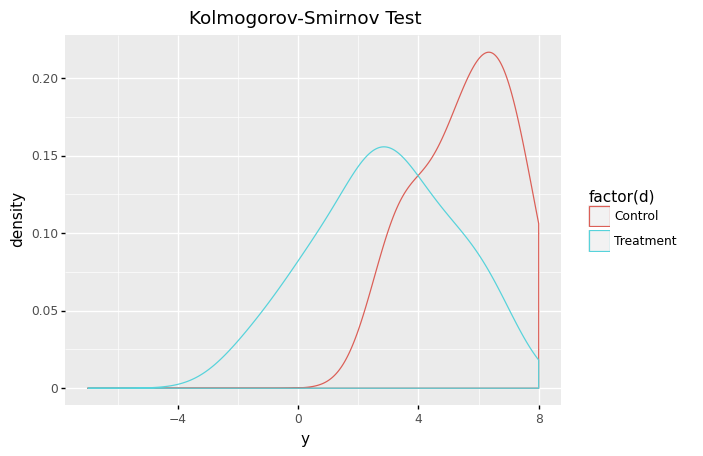

<ggplot: (8770747775185)>

In [10]:
tb = pd.DataFrame({
    'd' : np.concatenate((np.repeat(0, 20), np.repeat(1, 20))),
    'y' : (
        10.98,
 11.59,
 7.0,
 10.389999999999999,
 10.370000000000001,
 9.06,
 8.200000000000001,
 2.9299999999999997,
 7.949999999999999,
 9.92,
 6.220000000000001,
 5.010000000000002,
 8.280000000000001,
 7.000000000000002,
 5.329999999999998,
 8.9,
 4.029999999999999,
 5.760000000000002,
 6.709999999999999,
 3.459999999999999,
 4.869999999999999,
 3.6899999999999995,
 6.550000000000001,
 2.26,
 4.729999999999999,
 -0.6899999999999995,
 3.049999999999999,
 2.369999999999999,
 1.75,
 2.09,
 -1.6999999999999993,
 6.09,
 4.779999999999999,
 3.01,
 3.6099999999999994,
 6.220000000000001,
 0.5700000000000003,
 2.9400000000000013,
 0.370000000000001,
 0.6499999999999986
    )})

p.ggplot() +    p.geom_density(tb, p.aes(x='y', color='factor(d)')) +    p.xlim(-7, 8) +    p.labs(title = "Kolmogorov-Smirnov Test") +    p.scale_color_discrete(labels = ("Control", "Treatment"))

## Problem 3: Permutation Testing

Go back to a dataset like the one you created in 2a and 2b, with one experimental treatment and one experimental outcome. We now want to introduce a new concept called randomization based inference. In this, we compare the outcomes of an experiment against a null hypotheses (called the sharp null) that there is no treatment effect for any individual. 

Under this null hypothesis, we would have expected to see the observed results (*experiment_y*) no matter how treatment was assigned. So we can simulate other, hypothetical experiments,  without changing the outcomes to  calculate average treatment effects. You can read about this approach in *Causal Inference: The Mixtape" (pages 148-163)

- A: Create a new variable *permuted_treatement* with a 50% of being treated and a 50% chance of not being treated
- B: Calculate the average treatment effect under the sharp null hypothesis, using experiment_y and permuted_treatement
- C: Repeat this 1000 times. What is the average of the simulated average treatment effect under the null hypothesis. Plot a histogram of the outcomes
- D: What was the probability of seeing a treatment effect as large the treatment effect calculated in 2C. 
- E: In your words, explain what the probability calculated in 3D means

In [ ]:
near_chipotle

In [23]:
def estimate_uplift(ds):
    """
    Estiamte the difference in means between two groups.
    
    Parameters
    ----------
    ds: pandas.DataFrame
        a dataframe of samples.
        
    Returns
    -------
    estimated_uplift: dict[Str: float] containing two items:
        "estimated_effect" - the difference in mean values of $y$ for treated and untreated samples.
        "standard_error" - 90% confidence intervals arround "estimated_effect"
        
        
    """
    base = ds[ds.near_chipotle == 0]
    variant = ds[ds.near_chipotle == 1]
    
    delta = variant.production_treatment.mean() - base.production_treatment.mean()
    delta_err = 1.96 * np.sqrt(
        variant.production_treatment.var() / variant.shape[0] + 
        base.production_treatment.var() / base.shape[0])
    
    return {"estimated_effect": delta, "standard_error": delta_err}

estimate_uplift(data)

{'estimated_effect': 1.0, 'standard_error': 0.0}

In [24]:
data_1['Z'] = np.where(data['production_treatment'] == 0,1,0)

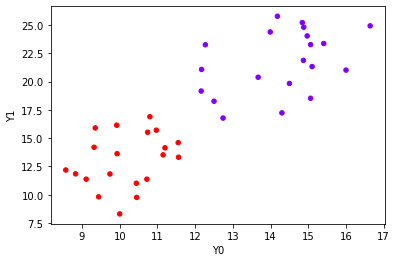

In [25]:
data.plot.scatter(x="Y0", y="Y1", c="Z", cmap="rainbow", colorbar=False);

<AxesSubplot:xlabel='Y1', ylabel='Density'>

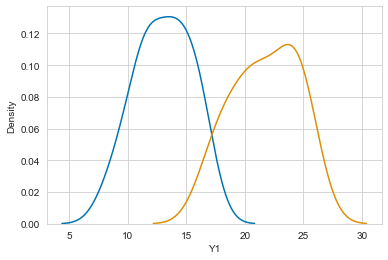

In [52]:
sns.kdeplot(data.loc[lambda data: data.near_chipotle == 0].Y1, label="untreated")
sns.kdeplot(data.loc[lambda data: data.near_chipotle == 1].Y1, label="treated")

<AxesSubplot:xlabel='Y0', ylabel='Density'>

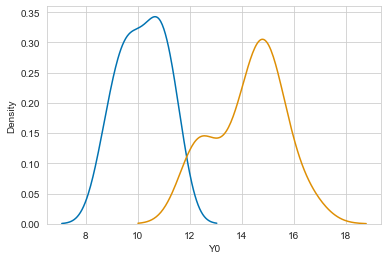

In [53]:
sns.kdeplot(data.loc[lambda data: data.near_chipotle == 0].Y0, label="untreated")
sns.kdeplot(data.loc[lambda data: data.near_chipotle == 1].Y0, label="treated")

<AxesSubplot:xlabel='Y0', ylabel='Density'>

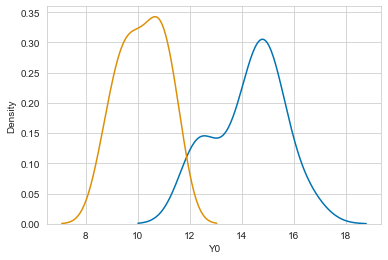

In [54]:
sns.kdeplot(data.loc[lambda data: data.Z == 0].Y0, label="untreated")
sns.kdeplot(data.loc[lambda data: data.Z == 1].Y0, label="treated")

<AxesSubplot:xlabel='Y1', ylabel='Density'>

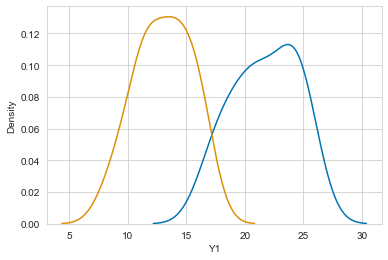

In [55]:
sns.kdeplot(data.loc[lambda data: data.Z == 0].Y1, label="untreated")
sns.kdeplot(data.loc[lambda data: data.Z == 1].Y1, label="treated")

In [57]:
data.head(6)

,User,near_chipotle,production_treatment,Y0,Y1,Y_diff,id,key,0,1,...,31,32,33,34,35,36,37,38,39,Z
0,0,1,1,12.27,23.25,10.98,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,14.18,25.77,11.59,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,12.16,19.16,7.00,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,13.99,24.38,10.39,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,14.84,25.21,10.37,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,1,14.97,24.03,9.06,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data_4 = pd.DataFrame(2*np.sin(data+1))


In [ ]:
dfDirty = data_4+0.00001*np.random.rand(n, 91390)

In [ ]:
grangercausalitytests(data_4, maxlag=20, verbose=False)    # Runs fine

In [ ]:
grangercausalitytests(dfDirty, maxlag=20, verbose=False)    # Runs fine

In [28]:
from causalinference import CausalModel

#cm = CausalModel(
#    Y=data.near_chipotle.values, 
#    D=data..values, 
#    X=data.Z.values)

#cm.est_via_ols(adj=1)

#print(cm.estimates)

In [31]:
df = data[["User", "near_chipotle", "production_treatment", "Y0", "Y1"]]
num_cols = data[["Y0", "Y1"]]
cat_cols = data[["User", "near_chipotle", "production_treatment"]]
cat_cols = data[["User"]]
df_one_hot = pd.get_dummies(data[["User", "near_chipotle", "production_treatment"]], drop_first=True)
df_cleaned = pd.concat([data[["Y0", "Y1"]], df_one_hot, data[["near_chipotle", "production_treatment"]]], axis=1)
df_cleaned.head()



,Y0,Y1,User,near_chipotle,production_treatment,near_chipotle,production_treatment
0,12.27,23.25,0,1,1,1,1
1,14.18,25.77,1,1,1,1,1
2,12.16,19.16,2,1,1,1,1
3,13.99,24.38,3,1,1,1,1
4,14.84,25.21,4,1,1,1,1


In [32]:
for elem in data['User'].unique():
    data[str(elem)] = data['User'] == elem

data["0"] = data["0"].astype(int)
data["1"] = data["1"].astype(int)
data["2"] = data["2"].astype(int)
data["3"] = data["3"].astype(int)
data["4"] = data["4"].astype(int)
data["5"] = data["5"].astype(int)
data["6"] = data["6"].astype(int)
data["7"] = data["7"].astype(int)
data["8"] = data["8"].astype(int)
data["9"] = data["9"].astype(int)
data["10"] = data["10"].astype(int)
data["11"] = data["11"].astype(int)
data["12"] = data["12"].astype(int)
data["13"] = data["13"].astype(int)
data["14"] = data["14"].astype(int)
data["15"] = data["15"].astype(int)
data["16"] = data["16"].astype(int)
data["17"] = data["17"].astype(int)
data["18"] = data["18"].astype(int)
data["19"] = data["19"].astype(int)
data["20"] = data["20"].astype(int)


data["21"] = data["21"].astype(int)
data["22"] = data["22"].astype(int)
data["23"] = data["23"].astype(int)
data["24"] = data["24"].astype(int)
data["25"] = data["25"].astype(int)
data["26"] = data["26"].astype(int)
data["27"] = data["27"].astype(int)
data["28"] = data["28"].astype(int)
data["29"] = data["29"].astype(int)
data["30"] = data["30"].astype(int)


data["31"] = data["31"].astype(int)
data["32"] = data["32"].astype(int)
data["33"] = data["33"].astype(int)
data["34"] = data["34"].astype(int)
data["35"] = data["35"].astype(int)
data["36"] = data["36"].astype(int)
data["37"] = data["37"].astype(int)
data["38"] = data["38"].astype(int)
data["39"] = data["39"].astype(int)




In [33]:
data.head(6)

,User,near_chipotle,production_treatment,Y0,Y1,Y_diff,0,1,2,3,...,33,34,35,36,37,38,39,id,key,Z
0,0,1,1,12.27,23.25,10.98,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,1,1,14.18,25.77,11.59,0,1,0,0,...,0,0,0,0,0,0,0,2,1,0
2,2,1,1,12.16,19.16,7.00,0,0,1,0,...,0,0,0,0,0,0,0,3,1,0
3,3,1,1,13.99,24.38,10.39,0,0,0,1,...,0,0,0,0,0,0,0,4,1,0
4,4,1,1,14.84,25.21,10.37,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0
5,5,1,1,14.97,24.03,9.06,0,0,0,0,...,0,0,0,0,0,0,0,6,1,0


In [35]:
data_i = data.drop(columns=['User', 'near_chipotle', 'production_treatment'])
data_i.head(6)

,Y0,Y1,Y_diff,0,1,2,3,4,5,6,...,33,34,35,36,37,38,39,id,key,Z
0,12.27,23.25,10.98,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,14.18,25.77,11.59,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
2,12.16,19.16,7.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1,0
3,13.99,24.38,10.39,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4,1,0
4,14.84,25.21,10.37,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,0
5,14.97,24.03,9.06,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,6,1,0


In [36]:
agg_operations = {"production_treatment": 'count'}
agg_operations.update({
    feature: ['mean', 'std'] for feature in features
})

table_one = data.groupby("production_treatment").agg(agg_operations)
# merge MultiIndex columns together into 1 level
# table_one.columns = ['_'.join(col) for col in table_one.columns.values]
table_one.head()

production_treatment            Y0               Y1  \
                                     mean  std     mean       std   mean   
production_treatment                                                       
0                                       0  0.0  10.1895  0.900488  13.05   
1                                       1  0.0  14.2655  1.302413  21.72   

                                User          near_chipotle       
                           std  mean      std          mean  std  
production_treatment                                              
0                     2.389045  29.5  5.91608             0  0.0  
1                     2.791221   9.5  5.91608             1  0.0

In [37]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


def permutedata(df, random = True):
    tb = data.copy()
    first_half = np.ceil(tb.shape[0] / 2)
    second_half = tb.shape[0] - first_half
    if random:
        tb = tb.sample(frac=1)
        tb['near_chipotle'] = np.concatenate((np.repeat(1, first_half), np.repeat(0, second_half)))
    
    te1 = tb[tb['near_chipotle']==1]['production_treatment'].mean()
    te0 = tb[tb['near_chipotle']==0]['production_treatment'].mean()
    
    
    ate = te1 - te0
    return ate

print(permutedata(data, random = False))
iterations = 1000
permutation = pd.DataFrame({
    'iteration': range(iterations),
    'ate' : [permutedata(data, random=False), 
                            *[permutedata(data, random=True) for x in range(iterations-1)]]}
)
# calculating the p-value

permutation = permutation.sort_values('ate', ascending=False)
permutation['rank'] = np.arange(1, iterations+1)
p_value = permutation[permutation.iteration==0]['rank'].astype(float) / iterations
print(p_value)

1.0
0    0.001
Name: rank, dtype: float64
